<a href="https://colab.research.google.com/github/choi-yongsuk/deep-learning-nlp/blob/master/imdb_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install feedparser
!pip install newspaper3k
!pip install konlpy

#!pip install bs4
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.1 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=8840f4e13cc6c2a05a9410102049c878293007ddf249a0ef77ec5d1fc1194050
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 211 kB 5.3 MB/s 
     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 7.4 MB 67.8 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=283d322cee275504ea4457b77bf38b068d61def505dcd77ba9e99dcbef75ac41
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel

In [6]:
import os
import re
import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

# IMDB 데이터다운로드

data_set = tf.keras.utils.get_file(
      fname="imdb.tar.gz", #downloaded file name
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
      extract=True)

84140032/84125825 [==============================] - 4s 0us/step


In [7]:
def directory_data(directory):
    data = {}
    data["review"] = []
    for file_path in os.listdir(directory):
      with open(os.path.join(directory, file_path), "r",encoding='utf-8') as file:
        data["review"].append(file.read())
    return pd.DataFrame.from_dict(data)

def data(directory):
    pos_df = directory_data(os.path.join(directory, "pos"))
    neg_df = directory_data(os.path.join(directory, "neg"))
    pos_df["sentiment"] = 1
    neg_df["sentiment"] = 0
    return pd.concat([pos_df, neg_df])

#학습    
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))

#테스를
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))



In [8]:
print(train_df.head())
reviews = list(train_df['review'])
print(reviews[0])

# 문자열 문장 리스트를 토큰화
tokenized_reviews = [r.split() for r in reviews]
print(tokenized_reviews[0])

# 토큰화된 리스트에 대한 각 길이를 저장
review_len_by_token = [len(t) for t in tokenized_reviews]
print(review_len_by_token[0])

# 토큰화된 것을 붙여서 음절의 길이를 저장
review_len_by_alphabet = [len(s.replace(' ','')) for s in reviews]
print(review_len_by_alphabet[0])



                                              review  sentiment
0  Finally a thriller which omits the car chases,...          1
1  Super Speedway makes a great demo of your new ...          1
2  "Welcome to Collingwood" offers some of the mo...          1
3  If the themes of The Girl From Missouri sound ...          1
4  There seems to be only two types of reviews of...          1
Finally a thriller which omits the car chases, explosions and other eye catching effects. The movie combines a simple plot (assasination of a french president) with an excellent background. It takes a look behind mans behavior with authorities, and explains why we would obey almost every order (even murder) which would be given to us.<br /><br />Furthermore it shows us how secret services can manipulate the run of history and how hardly they can be controlled. The best thing on this movie is, that there is no classic "Hollywood end" which can easily be predicted.
['Finally', 'a', 'thriller', 'which', 'omits',

Text(0, 0.5, 'Number of Reviews')

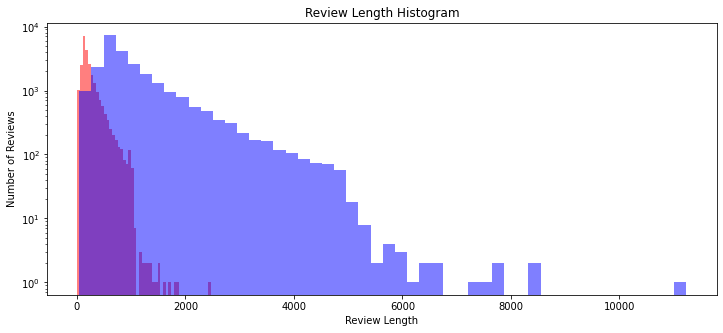

In [9]:
import matplotlib.pyplot as plt
# 이미지 사이즈 선언, figsize: (가로, 세로) 형태의 튜블로 입력
plt.figure(figsize=(12,5))

#히스토그램 선언
# bins: 히스토그갬 값들에 대한 버킷 범위
# range: x축 값의 범위
# alphpa: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(review_len_by_token, bins=50, alpha=0.5, color='r', label='word')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목, x축 라벨, y축 라벨
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')


In [10]:
import numpy as np

print('문장 단어의 개수가 가장 많은: ', np.max(review_len_by_token))
print('문장 단어의 개수가 가장 작은: ', np.min(review_len_by_token))
print('문장 평균길이: ', np.mean(review_len_by_token))
print('문장 길이 표준편차: ', np.std(review_len_by_token))
print('문장 중간길이: ', np.median(review_len_by_token))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1사분위 길이: ', np.percentile(review_len_by_token, 25))
print('제 3사분위 길이: ', np.percentile(review_len_by_token, 75))


문장 단어의 개수가 가장 많은:  2470
문장 단어의 개수가 가장 작은:  10
문장 평균길이:  233.7872
문장 길이 표준편차:  173.72955740506563
문장 중간길이:  174.0
제 1사분위 길이:  127.0
제 3사분위 길이:  284.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f0e5b1f2450>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0e5b1f74d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e5b200a50>],
 'means': [<matplotlib.lines.Line2D at 0x7f0e5b200510>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e5b1f7f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0e5b1f2a10>,
  <matplotlib.lines.Line2D at 0x7f0e5b1f2f50>]}

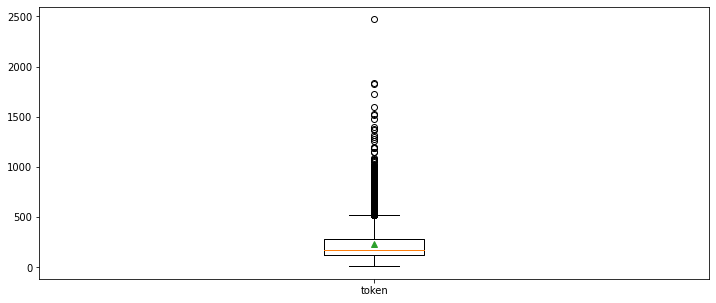

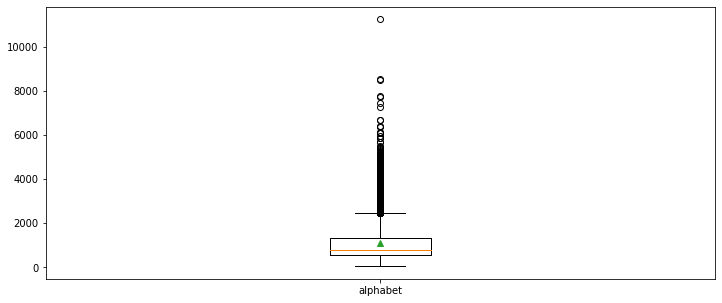

In [11]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([review_len_by_token],
            labels=['token'],
            showmeans=True)

plt.figure(figsize=(12, 5))
plt.boxplot([review_len_by_alphabet],
             labels=['alphabet'],
             showmeans=True)

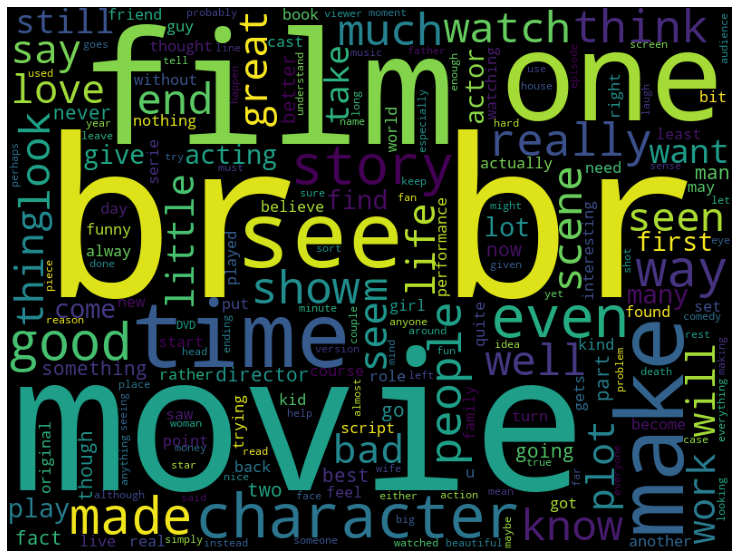

In [12]:
from pyparsing.core import Word
from wordcloud import WordCloud, STOPWORDS #
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width =800, height=600).generate(' '.join(train_df['review']))

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


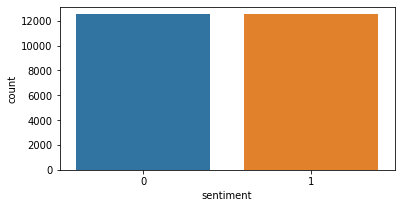

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = train_df['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_df['sentiment'])
plt.show()


kaggle word2vec

In [17]:
# /content/drive/MyDrive/nlp-data/word2vec-nlp-tutorial.zip

import zipfile
DATA_IN_PATH = '/content/drive/MyDrive/nlp-data/'
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
  zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
  zipRef.extractall(DATA_IN_PATH)
  zipRef.close()


In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

print("파일크기 : ")
for file in os.listdir(DATA_IN_PATH):
  if 'tsv' in file and 'zip' not in file:
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, delimiter = '\t', quoting = 3)
print(train_data.head())

print('전체 학습데이터의 개수: {}'.format(len(train_data)))

train_length = train_data['review'].apply(len)
print(train_length.head())


파일크기 : 
labeledTrainData.tsv          33.56MB
unlabeledTrainData.tsv        67.28MB
testData.tsv                  32.72MB
         id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...
전체 학습데이터의 개수: 25000
0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64


In [20]:
print("")
print('리뷰 길이 개수가 가장 많은: ', format(np.max(train_length)))
print('리뷰 길이 개수가 가장 작은: ', format(np.min(train_length)))
print('리뷰 길이 평균 값: ', format(np.mean(train_length)))
print('리뷰 길이 표준편차: ', format(np.std(train_length)))
print('리뷰 길이 중간 값: ', format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1사분위 길이: ', format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3사분위 길이: ', format(np.percentile(train_length, 75)))



print("")
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))
print('리뷰 단어 개수가 가장 많은: ', format(np.max(train_length)))
print('리뷰 단어 개수가 가장 작은: ', format(np.min(train_length)))
print('리뷰 단어 평균길이: ', format(np.mean(train_length)))
print('리뷰 단어  표준편차: ', format(np.std(train_length)))
print('문장 중간길이: ', format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 제 1사분위: ', format(np.percentile(train_length, 25)))
print('리뷰 단어 제 3사분위: ', format(np.percentile(train_length, 75)))

print("")
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) # 첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
print("물음표가 있는 질문: [:.2f]%".format(qmarks * 100))
print("마침표가 있는 질문: [:.2f]%".format(fullstop * 100))
print("첫 글자가 대문자 인 질문: [:.2f]%".format(capital_first * 100))
print("대문자가있는 질문: [:.2f]%".format(capitals * 100))
print("숫자가있는 질문: [:.2f]%".format(numbers * 100))



리뷰 길이 개수가 가장 많은:  13710
리뷰 길이 개수가 가장 작은:  54
리뷰 길이 평균 값:  1329.71056
리뷰 길이 표준편차:  1005.2191407969142
리뷰 길이 중간 값:  983.0
리뷰 길이 제 1사분위 길이:  705.0
리뷰 길이 제 3사분위 길이:  1619.0

리뷰 단어 개수가 가장 많은:  13710
리뷰 단어 개수가 가장 작은:  54
리뷰 단어 평균길이:  1329.71056
리뷰 단어  표준편차:  1005.2191407969142
문장 중간길이:  983.0
리뷰 단어 제 1사분위:  705.0
리뷰 단어 제 3사분위:  1619.0

물음표가 있는 질문: [:.2f]%
마침표가 있는 질문: [:.2f]%
첫 글자가 대문자 인 질문: [:.2f]%
대문자가있는 질문: [:.2f]%
숫자가있는 질문: [:.2f]%
